In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from datetime import datetime



In [103]:
#%pip install pandas 
#%pip install matplotlib.pyplot 
#%pip install t seaborn 
#%pip install numpy
#%pip install yfinance 

In [104]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/BTC.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/S&P500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/XAU(GOLD).csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
#df_btc.set_index('Date', inplace=True)
#df_sp500.set_index('Date', inplace=True)
#df_gold.set_index('Date', inplace=True)


In [105]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
                                Date          Close  Volume           Open  \
count                           1883    1883.000000     0.0    1883.000000   
mean   2022-01-16 23:28:38.746680832   34040.240998     NaN   34020.393840   
min              2019-03-08 00:00:00    3864.900000     NaN    3864.600000   
25%              2020-08-26 12:00:00   11361.600000     NaN   11368.050000   
50%              2021-12-10 00:00:00   28285.600000     NaN   28203.900000   
75%              2023-03-29 12:00:00   50395.100000     NaN   50709.850000   
max              2025-02-09 00:00:00  106484.000000     NaN  106504.000000   
std                              NaN   24396.582505     NaN   24382.936974   

               High            Low  
count    1883.00000    1883.000000  
mean    34367.86240   33718.551832  
min      3894.70000    3810.700000  
25%     11408.80000   11229.700000  
50%     28460.30000   28109.200000  
75%     51436.25000   49898.250000  
m

In [106]:
df_btc.head()

,Date,Close,Volume,Open,High,Low
0,2025-02-09,96852.7,NaN,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,NaN,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,NaN,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,NaN,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,NaN,98042.5,97824.0,96510.6


In [107]:
df_btc=df_btc.drop(columns=["Volume"],axis=1)
df_gold=df_gold.drop(columns=["Volume"],axis=1)

In [108]:
df_btc.head()

,Date,Close,Open,High,Low
0,2025-02-09,96852.7,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,98042.5,97824.0,96510.6


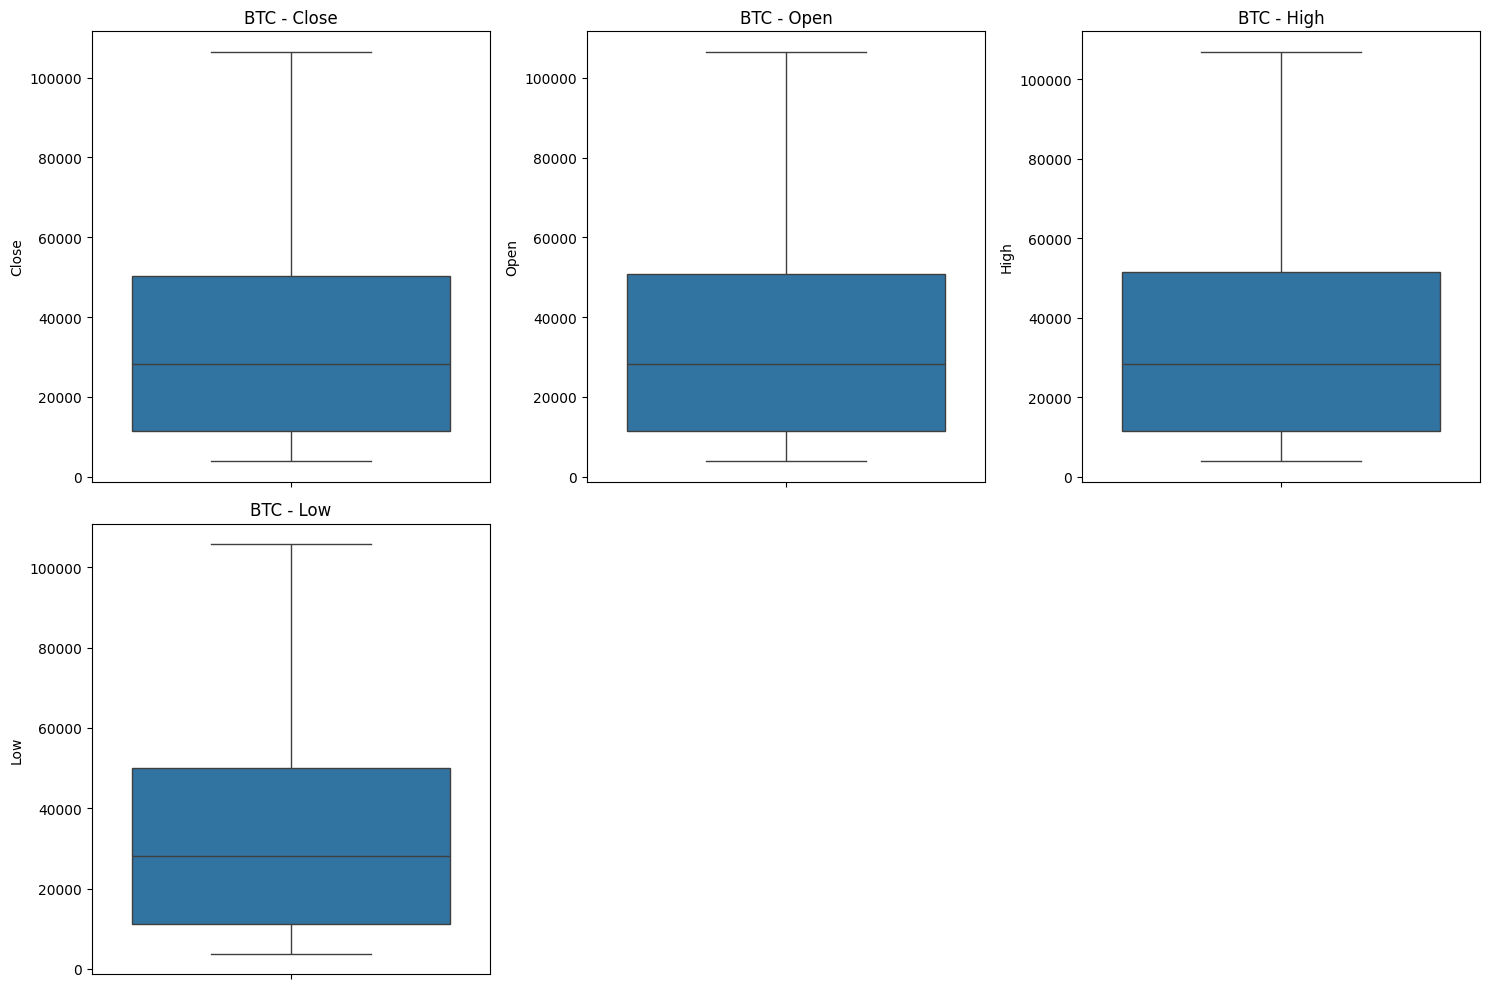

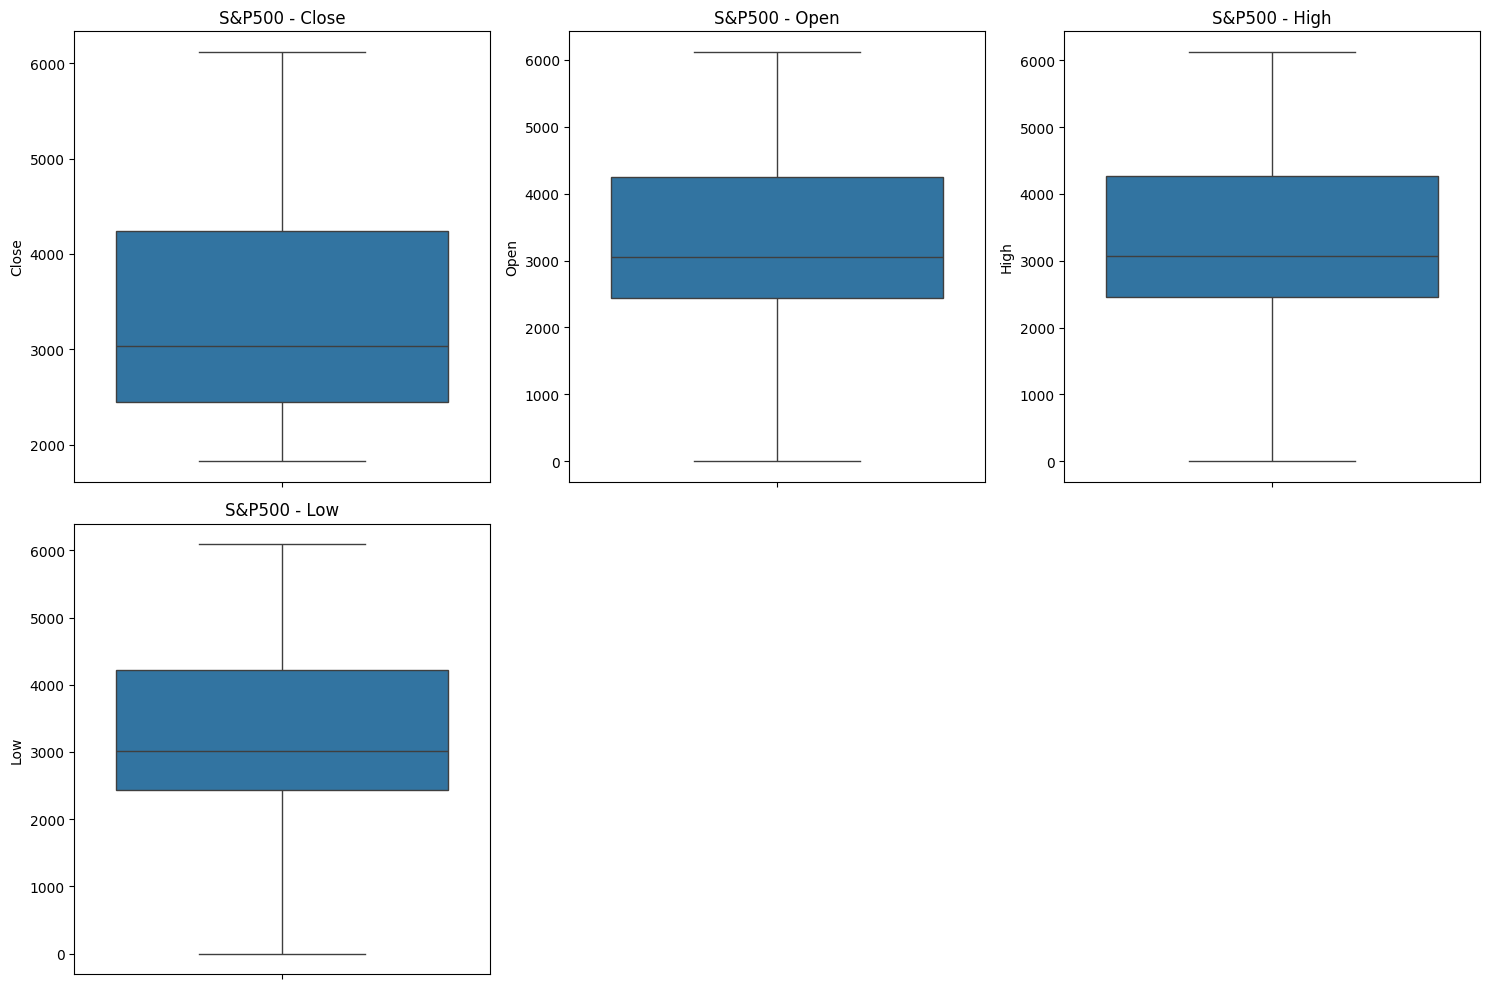

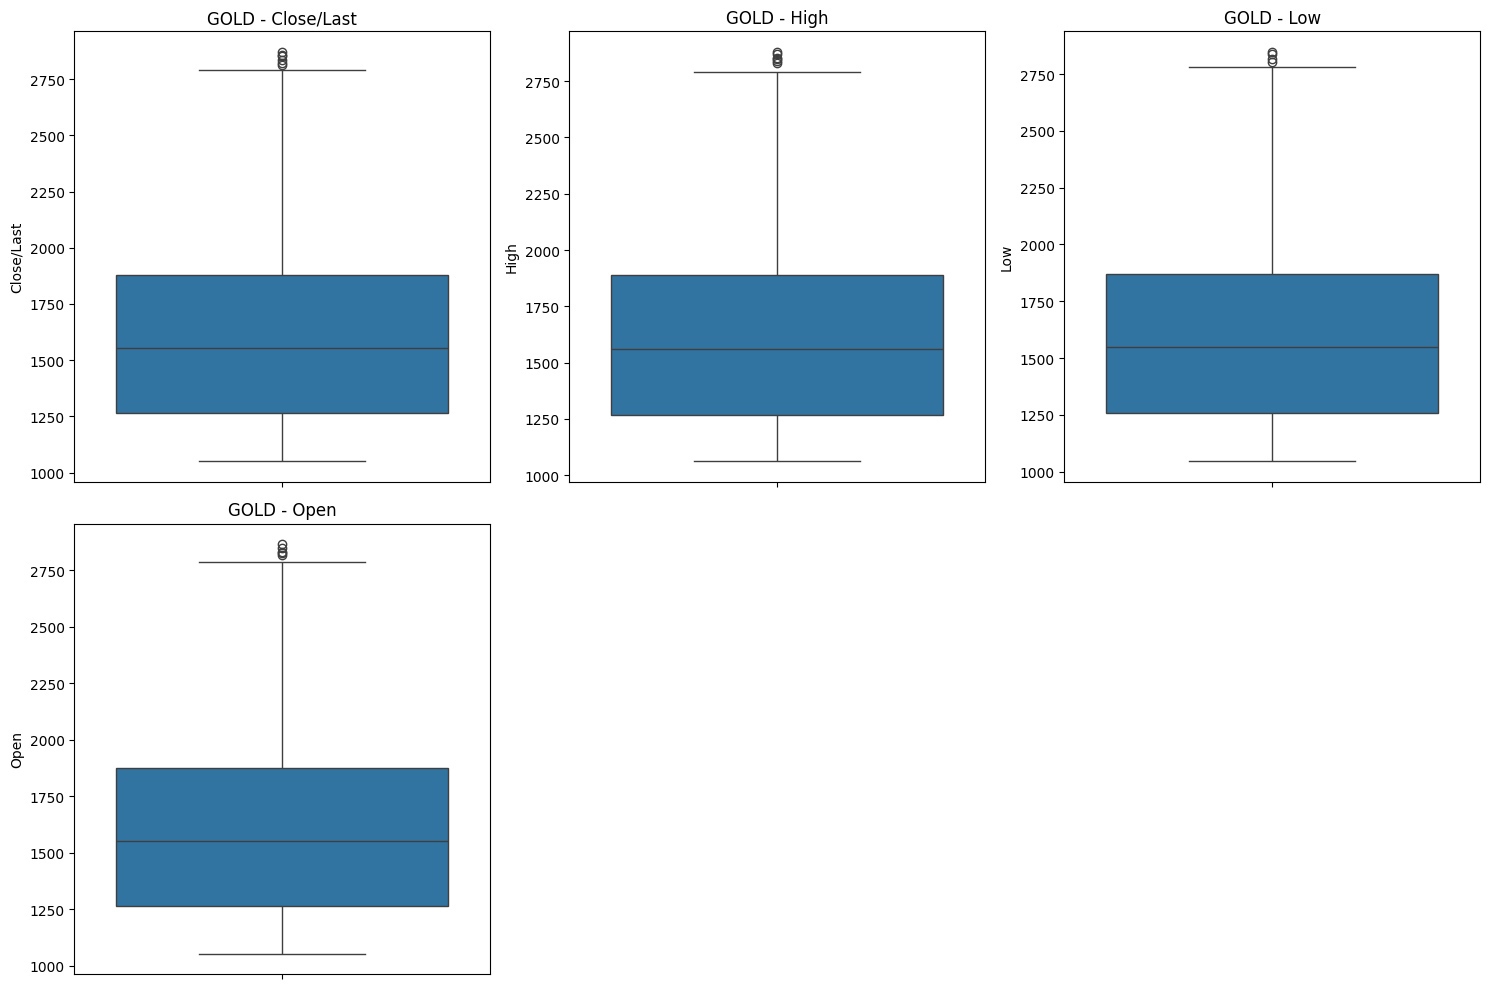

In [109]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [110]:
df_sp500 = df_sp500[~((df_sp500.iloc[:, -3:] == 0.00).all(axis=1))]
print(df_sp500.head())
print("Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !")

        Date    Close     Open     High      Low
0 2025-02-07  6025.99  6083.13  6101.28  6019.96
1 2025-02-06  6083.57  6072.22  6084.03  6046.83
2 2025-02-05  6061.48  6020.45  6062.86  6007.06
3 2025-02-04  6037.88  5998.14  6042.48  5990.87
4 2025-02-03  5994.57  5969.65  6022.13  5923.93
Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !


In [111]:
# Correction des dates pour df_btc
df_btc["Date"] = pd.to_datetime(df_btc["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Correction des dates pour df_sp500
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Vérification après conversion
print(df_btc.head())
print(df_sp500.head())

print("✅ Les dates ont été converties au format JJ/MM/AAAA !")


         Date    Close     Open     High      Low
0  09/02/2025  96852.7  96218.7  97297.8  96369.0
1  08/02/2025  96623.3  95981.2  96862.8  95716.1
2  07/02/2025  96402.1  97460.6  96862.8  96237.1
3  06/02/2025  97467.5  97623.4  97872.2  96424.2
4  05/02/2025  97631.2  98042.5  97824.0  96510.6
         Date    Close     Open     High      Low
0  07/02/2025  6025.99  6083.13  6101.28  6019.96
1  06/02/2025  6083.57  6072.22  6084.03  6046.83
2  05/02/2025  6061.48  6020.45  6062.86  6007.06
3  04/02/2025  6037.88  5998.14  6042.48  5990.87
4  03/02/2025  5994.57  5969.65  6022.13  5923.93
✅ Les dates ont été converties au format JJ/MM/AAAA !


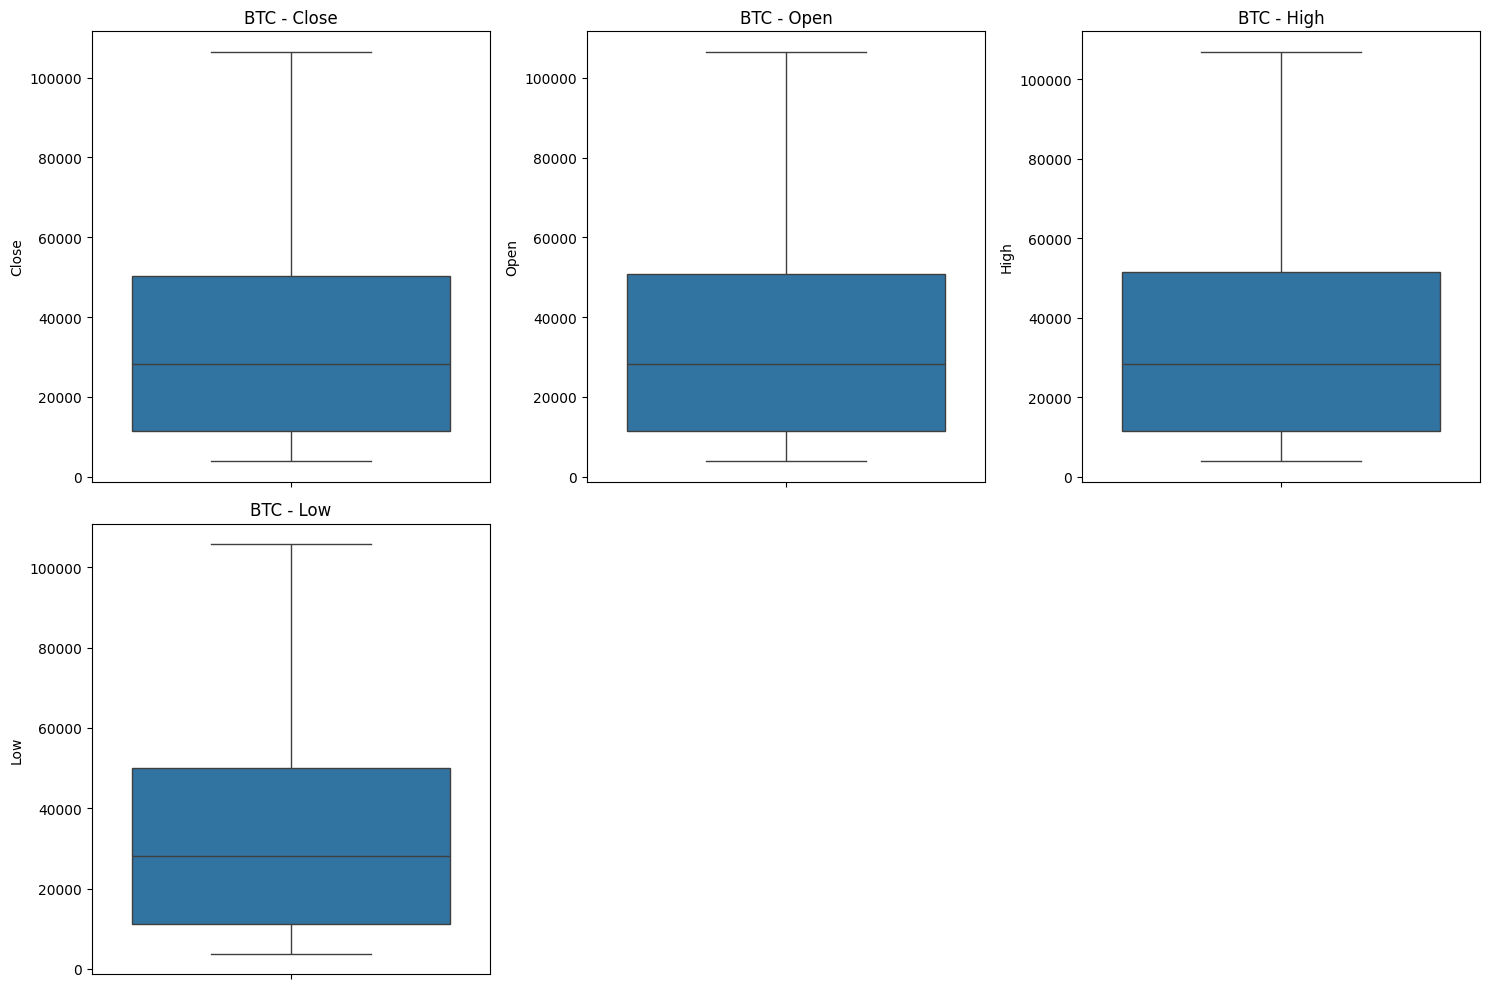

In [ ]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [ ]:
df_btc.head()


,Date,Close,Open,High,Low
0,09/02/2025,96852.7,96218.7,97297.8,96369.0
1,08/02/2025,96623.3,95981.2,96862.8,95716.1
2,07/02/2025,96402.1,97460.6,96862.8,96237.1
3,06/02/2025,97467.5,97623.4,97872.2,96424.2
4,05/02/2025,97631.2,98042.5,97824.0,96510.6


In [ ]:
df_btc.to_csv('../cleancsv/df_btc.csv', index=True)
df_sp500.to_csv('../cleancsv/df_sp500.csv', index=True)
df_gold.to_csv('../cleancsv/df_gold.csv', index=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for df in [df_btc, df_sp500, df_gold]:
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)  # Correction du format
    else:
        print("⚠️ La colonne 'Date' est absente de ce dataset :", df.columns)

        Date   Close_x  BTC_Open  BTC_High   BTC_Low  Close_y  SP500_Open  \
0 2025-02-06   97467.5   97623.4   97872.2   96424.2  6083.57     6072.22   
1 2025-02-05   97631.2   98042.5   97824.0   96510.6  6061.48     6020.45   
2 2025-02-04   98213.4  100069.0   98890.5   97183.6  6037.88     5998.14   
3 2025-02-03  100151.0   92749.8  101693.0  100151.0  5994.57     5969.65   
4 2025-01-31  102381.0  104005.0  102771.0  102138.0  6040.53     6096.79   

   SP500_High  SP500_Low   Gold_Close    Gold_High     Gold_Low    Gold_Open  
0     6084.03    6046.83  2856.000000  2871.699951  2836.300049  2865.199951  
1     6062.86    6007.06  2871.600098  2880.500000  2848.000000  2850.000000  
2     6042.48    5990.87  2853.300049  2853.300049  2816.100098  2827.600098  
3     6022.13    5923.93  2833.899902  2848.399902  2780.899902  2818.199951  
4     6120.91    6030.93  2812.500000  2838.000000  2804.000000  2829.000000  


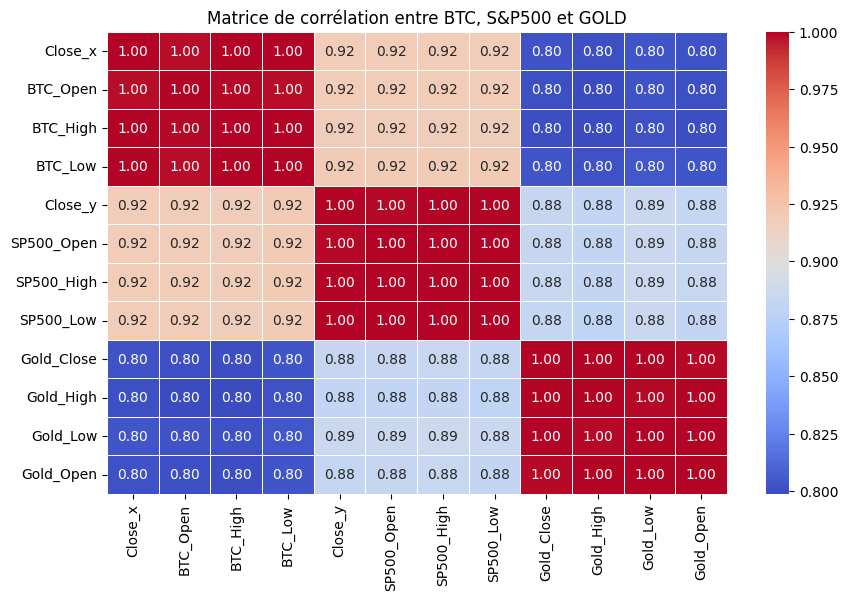

In [ ]:
# ✅ Renommer les colonnes pour éviter les conflits après fusion
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Fusionner les datasets sur la colonne "Date"
df_merged = df_btc.merge(df_sp500, on="Date").merge(df_gold, on="Date")

# ✅ Vérification des données après fusion
print(df_merged.head())

# ✅ Sélectionner uniquement les colonnes numériques pour la corrélation
df_corr = df_merged.drop(columns=["Date"])

# ✅ Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# ✅ Affichage avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre BTC, S&P500 et GOLD")
plt.show()


In [ ]:
# ✅ Vérification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    # Dictionnaire des nouveaux noms des colonnes pour chaque actif
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    # Vérifier si l'asset est dans le dictionnaire
    if asset_name in price_columns:
        price_col = price_columns[asset_name]  # Récupère le bon nom de colonne
    else:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  # Retourne None pour price_col et le DataFrame inchangé

    # Vérifier si la colonne existe dans le DataFrame
    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return None, df  # Retourne None pour éviter les erreurs

    print(f"✅ La colonne '{price_col}' est bien trouvée pour {asset_name}.")
    return price_col, df  # Retourne le nom correct de la colonne et le DataFrame

# ✅ Calcul des rendements
def compute_returns(df, asset_name):
    df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date en datetime
    df = df.sort_values("Date")  # Trier les données par date
    df = df.set_index("Date")  # Définir la colonne Date comme index

    # Vérifier et récupérer la colonne de prix
    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  # Si la colonne n'est pas trouvée, arrêter l'exécution
        return df  

    # Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # Affichage des rendements moyens
    print(f"\n📊 Rendements moyens pour {asset_name}:")
    print(f"✅ Quotidien: {df['Daily Return'].mean():.4%}")
    print(f"✅ Mensuel: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Annuel: {df['Annual Return'].mean():.4%}")

    return df


In [ ]:
# ✅ Vérification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    if asset_name in price_columns:
        price_col = price_columns[asset_name]
    else:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  

    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return None, df  

    print(f"✅ La colonne '{price_col}' est bien trouvée pour {asset_name}.")
    return price_col, df  

# ✅ Calcul des rendements, volatilité et Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    df["Date"] = pd.to_datetime(df["Date"])  
    df = df.sort_values("Date")  
    df = df.set_index("Date")  

    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  
        return df  

    # 📈 Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # 📊 Volatilité (écart-type des rendements)
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # 🔥 Ratio de Sharpe (en supposant un taux sans risque de 2% par an)
    sharpe_ratio = (df["Daily Return"].mean() * 252 - risk_free_rate) / (daily_volatility * np.sqrt(252))

    # 🎯 Affichage des résultats
    print(f"\n📊 Statistiques pour {asset_name}:")
    print(f"✅ Rendement Quotidien Moyen: {df['Daily Return'].mean():.4%}")
    print(f"✅ Rendement Mensuel Moyen: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Rendement Annuel Moyen: {df['Annual Return'].mean():.4%}")
    print(f"📉 Volatilité Quotidienne: {daily_volatility:.4%}")
    print(f"📉 Volatilité Mensuelle: {monthly_volatility:.4%}")
    print(f"📉 Volatilité Annuelle: {annual_volatility:.4%}")
    print(f"⚖️ Ratio de Sharpe: {sharpe_ratio:.2f}")

    return df

In [ ]:
print(f"📌 Colonnes disponibles dans {asset_name} :", df.columns)


📌 Colonnes disponibles dans Or (GOLD) : Index(['Date', 'Gold_Close', 'Gold_High', 'Gold_Low', 'Gold_Open'], dtype='object')


In [ ]:
print(df.dtypes)  # Vérifie si "Date" est bien un objet (string) ou datetime


Date          datetime64[ns]
Gold_Close           float64
Gold_High            float64
Gold_Low             float64
Gold_Open            float64
dtype: object


In [ ]:
print(df["Date"].isna().sum())


0


In [ ]:
print(df.index)  # Vérifie si la colonne Date est déjà l'index
df = df.reset_index()  # Remet tout à plat


RangeIndex(start=0, stop=2539, step=1)


In [ ]:
# ✅ Vérification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    if asset_name in price_columns:
        price_col = price_columns[asset_name]
    else:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  

    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return None, df  

    print(f"✅ La colonne '{price_col}' est bien trouvée pour {asset_name}.")
    return price_col, df  

# ✅ Calcul des rendements, volatilité et Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    df["Date"] = pd.to_datetime(df["Date"])  
    df = df.sort_values("Date")  
    df = df.set_index("Date")  

    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  
        return df  

    # 📈 Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # 📊 Volatilité (écart-type des rendements)
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # 🔥 Ratio de Sharpe (en supposant un taux sans risque de 2% par an)
    sharpe_ratio = (df["Daily Return"].mean() * 252 - risk_free_rate) / (daily_volatility * np.sqrt(252))

    # 🎯 Affichage des résultats
    print(f"\n📊 Statistiques pour {asset_name}:")
    print(f"✅ Rendement Quotidien Moyen: {df['Daily Return'].mean():.4%}")
    print(f"✅ Rendement Mensuel Moyen: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Rendement Annuel Moyen: {df['Annual Return'].mean():.4%}")
    print(f"📉 Volatilité Quotidienne: {daily_volatility:.4%}")
    print(f"📉 Volatilité Mensuelle: {monthly_volatility:.4%}")
    print(f"📉 Volatilité Annuelle: {annual_volatility:.4%}")
    print(f"⚖️ Ratio de Sharpe: {sharpe_ratio:.2f}")

    return df

In [ ]:
# ✅ Vérification et renommage des colonnes
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Vérification de la colonne Date
for df, asset in zip([df_btc, df_sp500, df_gold], ["BTC", "SP500", "GOLD"]):
    if "Date" not in df.columns:
        print(f"❌ Erreur : La colonne 'Date' est absente dans {asset} !")
    else:
        df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date au bon format
        df.sort_values("Date", inplace=True)  # Trier les données
        df.set_index("Date", inplace=True)  # Définir Date comme index

# ✅ Fonction pour calculer les rendements, la volatilité et le Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    # Vérifier et récupérer la colonne de prix
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }
    
    if asset_name not in price_columns:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu.")
        return df
    
    price_col = price_columns[asset_name]

    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Colonnes disponibles :", df.columns)
        return df  

    # ✅ Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # ✅ Calcul de la volatilité
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # ✅ Calcul du Sharpe Ratio
    sharpe_ratio = (df["Annual Return"].mean() - risk_free_rate) / annual_volatility if annual_volatility > 0 else np.nan

    # 📊 ✅ Affichage des résultats
    print(f"\n📊 **Résultats pour {asset_name}** :")
    print(f"✅ Rendement quotidien moyen : {df['Daily Return'].mean():.4%}")
    print(f"✅ Rendement mensuel moyen : {df['Monthly Return'].mean():.4%}")
    print(f"✅ Rendement annuel moyen : {df['Annual Return'].mean():.4%}")

    print(f"\n📈 **Volatilité :**")
    print(f"📌 Quotidienne : {daily_volatility:.4%}")
    print(f"📌 Mensuelle : {monthly_volatility:.4%}")
    print(f"📌 Annuelle : {annual_volatility:.4%}")

    print(f"\n📉 **Ratio de Sharpe :** {sharpe_ratio:.4f}")

    return df

# ✅ Exécuter la fonction pour chaque actif
df_btc = compute_returns(df_btc, "BTC")
df_sp500 = compute_returns(df_sp500, "SP500")
df_gold = compute_returns(df_gold, "GOLD")

❌ Erreur : La colonne 'BTC_Close' n'existe pas dans BTC.
🛠 Colonnes disponibles : Index(['Close', 'BTC_Open', 'BTC_High', 'BTC_Low'], dtype='object')
❌ Erreur : La colonne 'SP500_Close' n'existe pas dans SP500.
🛠 Colonnes disponibles : Index(['Close', 'SP500_Open', 'SP500_High', 'SP500_Low'], dtype='object')

📊 **Résultats pour GOLD** :
✅ Rendement quotidien moyen : 0.0389%
✅ Rendement mensuel moyen : 0.7339%
✅ Rendement annuel moyen : 13.0659%

📈 **Volatilité :**
📌 Quotidienne : 0.9242%
📌 Mensuelle : 3.9468%
📌 Annuelle : 14.8227%

📉 **Ratio de Sharpe :** 0.7466


C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
